In [1]:
import matplotlib.pyplot as plt

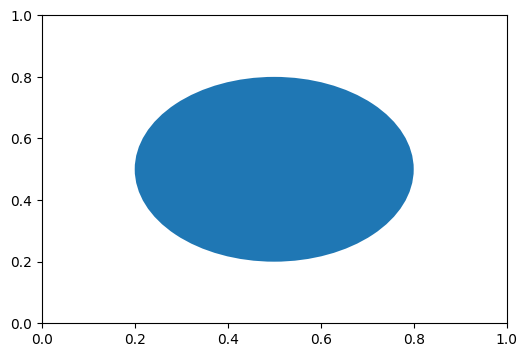

In [13]:
fig, ax = plt.subplots(figsize=(6,4))
c = plt.Circle((0.5,0.5), 0.3)
ax.add_artist(c)
#ax.autoscale_view()

In [9]:
type(c).__mro__

(matplotlib.patches.Circle,
 matplotlib.patches.Ellipse,
 matplotlib.patches.Patch,
 matplotlib.artist.Artist,
 object)

# Aspect Ratio

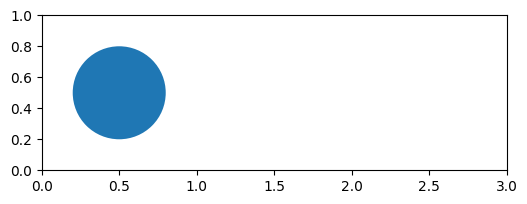

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlim(0,3)
c = plt.Circle((0.5,0.5), 0.3)
ax.add_artist(c)
#ax.autoscale_view()
ax.set_aspect(1)  # how much y space per x space

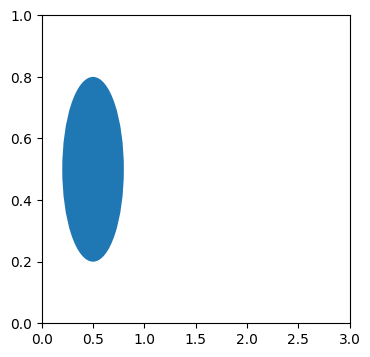

In [18]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlim(0,3)
c = plt.Circle((0.5,0.5), 0.3)
ax.add_artist(c)
#ax.autoscale_view()
ax.set_aspect(3) # want a square ax plot (don't care about the circle)

# Transformers: let us pick a Coordinate Reference System (CRS)

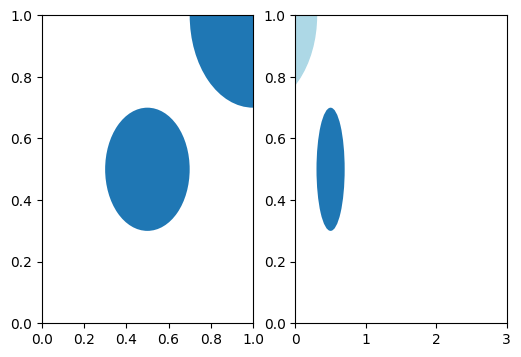

In [38]:
# 1. ax.transData
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))
ax2.set_xlim(0,3)

# left
c = plt.Circle((0.5,0.5), 0.2, transform=ax1.transData)
ax1.add_artist(c)

# right
c = plt.Circle((0.5,0.5), 0.2) # default: transform=ax2.transData
ax2.add_artist(c)

# transform based on ax1, but crop based on ax2
c = plt.Circle((1,1), 0.3, transform=ax1.transData, color="lightblue")  # where to position the shape
ax2.add_artist(c)  # how to crop the shape

c = plt.Circle((1,1), 0.3, transform=ax1.transData)  # where to position the shape
ax1.add_artist(c)  # how to crop the shape

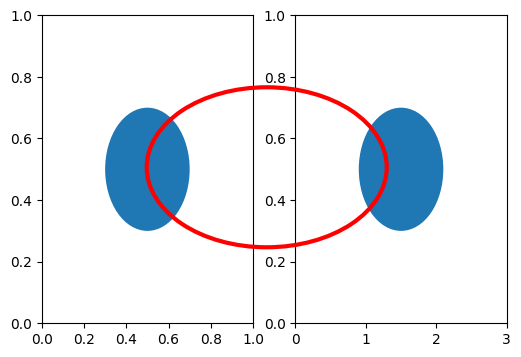

In [46]:
# 2. ax.transAxes and fig.transFigure (0,0 is bottom left, 1,1 is top right)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))
ax2.set_xlim(0,3)

# left
c = plt.Circle((0.5,0.5), 0.2, transform=ax1.transAxes)
ax1.add_artist(c)

# right
c = plt.Circle((0.5,0.5), 0.2, transform=ax2.transAxes)
ax2.add_artist(c)

# whole figure
c = plt.Circle((0.5,0.5), 0.2, transform=fig.transFigure, edgecolor="red", facecolor="none", linewidth=3)
fig.add_artist(c)

In [55]:
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}

100.0
300.0 200.0


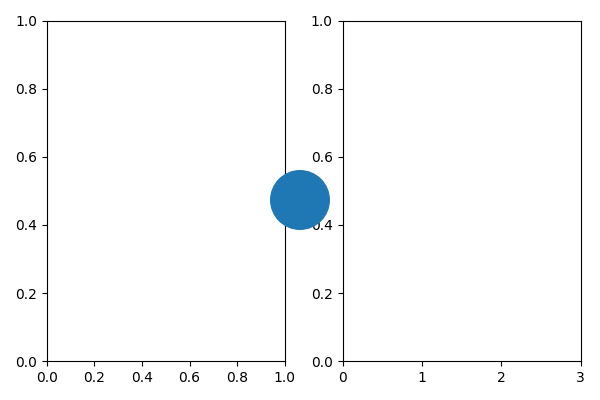

In [57]:
# 3. no CRS (raw pixel coordinates)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))
ax2.set_xlim(0,3)

print(fig.dpi)   # dots (aka pixel) per inch

width = 6*fig.dpi
height = 4*fig.dpi

x = width/2
y = height/2
print(x,y)

plt.tight_layout() # matplotlib does the cropping better than Jupyter

c = plt.Circle((x,y), 30, transform=None)
fig.add_artist(c)
fig.savefig("temp.png")

363.8636363636363 198.0


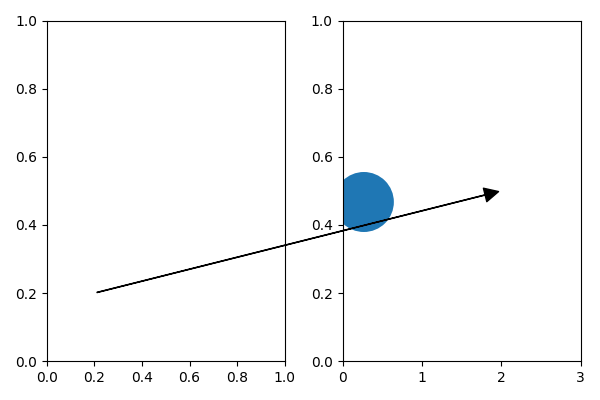

In [73]:
import matplotlib

# 4. mix and match
# GOAL: draw a visual circle at data coords 0.5,0.5 on right hand side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))
ax2.set_xlim(0,3)

x,y = ax2.transData.transform((0.5,0.5))
print(x,y)
c = plt.Circle((x,y), 30, transform=None)
ax2.add_artist(c)

plt.tight_layout() # crop now (after .transform, don't want to move anything!)

# GOAL: arrow from 0.2,0.2 (left) to 2,0.5 (right)
x1,y1 = ax1.transData.transform((0.2,0.2))
x2,y2 = ax2.transData.transform((2,0.5))
arrow = matplotlib.patches.FancyArrowPatch((x1,y1), (x2,y2), transform=None, color="k",
                                           arrowstyle="simple,head_width=10,head_length=10")
fig.add_artist(arrow)

# Custom Scatter Plots with Angles

2 5 90
3 1 0
6 6 45
8 1 180


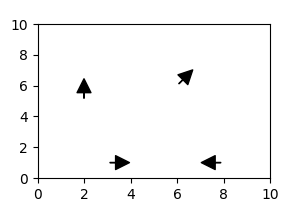

In [84]:
import pandas as pd
import math

df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])

fig, ax = plt.subplots(figsize=(3,2))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for row in df.itertuples():
    print(row.x, row.y, row.a)
    # v1: draw a circle for each scatter point
    
    # x, y = ax.transData.transform((row.x, row.y))
    # c = plt.Circle((x,y), radius=10, transform=None)
    # ax.add_artist(c)
    
    # v2: draw an arrow for each scatter point (correct angle)
    x, y = ax.transData.transform((row.x, row.y))
    a = math.radians(row.a)
    x_diff = math.cos(a) * 25
    y_diff = math.sin(a) * 25
    c = matplotlib.patches.FancyArrowPatch((x,y), (x+x_diff, y+y_diff),transform=None, color="k",
                                           arrowstyle="simple,head_width=10,head_length=10")
    ax.add_artist(c)

In [75]:
df

,x,y,a
0,2,5,90
1,3,1,0
2,6,6,45
3,8,1,180
